<div>
    <h1>Data Analysis And Price Prediction For Steam Action Games</h1>
</div>
<div>
<p style="color : green">Steam is a digital distribution platform for video games, developed by Valve Corporation. It allows users to purchase, download, and play games on their computers. Steam also provides features like cloud saves, game updates, multiplayer gaming, and community features like chat and game forums. It supports a wide range of games from indie developers to major studios.</p>
<p>This notebook demonstrates how data is cleaned using popular python data analysis libraries and how the data can be visualized and used in making predictions through ML</p>
</div>
<div><h1>Libraries Used</h1>
<ol>Pandas</ol>
<ol>Numpy</ol>
<ol>Seaborn</ol>
<ol>Keras</ol>
<ol>Sklearn</ol></div>

In [213]:
import pandas as pd
import numpy as np
import seaborn as sns

In [214]:
dataset=pd.read_csv(filepath_or_buffer="steam_cleaned.csv")
dataset.head()


,Name,Price,Release_date,Review_no,Review_type,Tags,Description
0,Black Myth: Wukong,59.99,2024-08-20,574097.0,Overwhelmingly Positive,"Mythology,Action RPG,Action,Souls-like,RPG,Com...",Black Myth: Wukong is an action RPG rooted in ...
1,"Warhammer 40,000: Space Marine 2",NaN,2024-09-09,23591.0,Very Positive,"Warhammer 40K,Action,Adventure,Third-Person Sh...",Embody the superhuman skill and brutality of a...
2,Counter-Strike 2,0.00,2012-08-21,8286153.0,Very Positive,"FPS,Shooter,Multiplayer,Competitive,Action,Tea...","For over two decades, Counter-Strike has offer..."
3,Warframe,0.00,NaN,589527.0,Very Positive,"Free to Play,Action RPG,Looter Shooter,Third-P...",Awaken as an unstoppable warrior and battle al...
4,Grand Theft Auto V,10.48,2015-04-14,1703156.0,Very Positive,"Open World,Action,Multiplayer,Crime,Automobile...",Grand Theft Auto V for PC offers players the o...


In [215]:
#lets check for nulls
dataset.isnull().sum()

Name              0
Price            51
Release_date     19
Review_no        47
Review_type      47
Tags              0
Description     426
dtype: int64

In [216]:
#lets remove all nulls
no_nulls=dataset.dropna()
no_nulls.isnull().sum()

Name            0
Price           0
Release_date    0
Review_no       0
Review_type     0
Tags            0
Description     0
dtype: int64

In [217]:
no_nulls.head()

,Name,Price,Release_date,Review_no,Review_type,Tags,Description
0,Black Myth: Wukong,59.99,2024-08-20,574097.0,Overwhelmingly Positive,"Mythology,Action RPG,Action,Souls-like,RPG,Com...",Black Myth: Wukong is an action RPG rooted in ...
2,Counter-Strike 2,0.00,2012-08-21,8286153.0,Very Positive,"FPS,Shooter,Multiplayer,Competitive,Action,Tea...","For over two decades, Counter-Strike has offer..."
4,Grand Theft Auto V,10.48,2015-04-14,1703156.0,Very Positive,"Open World,Action,Multiplayer,Crime,Automobile...",Grand Theft Auto V for PC offers players the o...
5,Red Dead Redemption 2,17.99,2019-12-05,565716.0,Very Positive,"Open World,Story Rich,Western,Adventure,Multip...",Winner of over 175 Game of the Year Awards and...
6,PUBG: BATTLEGROUNDS,0.00,2017-12-21,2423411.0,Mixed,"Survival,Shooter,Battle Royale,Multiplayer,FPS...",Play PUBG: BATTLEGROUNDS for free.\n\nLand on ...


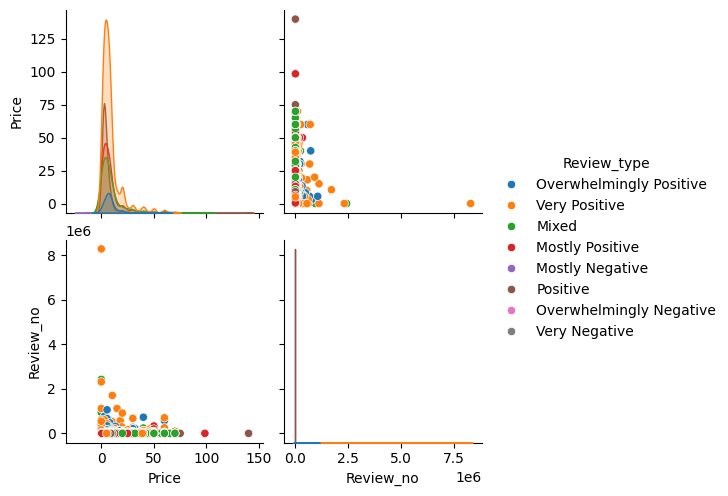

In [218]:
sns.pairplot(dataset,hue="Review_type")

In [219]:
#make the date format consistent
no_nulls["Release_date"]=pd.to_datetime(no_nulls["Release_date"],format="%Y-%m-%d")


C:\Users\julth\AppData\Local\Temp\ipykernel_16196\379124530.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_nulls["Release_date"]=pd.to_datetime(no_nulls["Release_date"],format="%Y-%m-%d")


In [220]:
#let's remove all free games 
zeros_index=[]
index_count=0
for _index_, value in no_nulls["Price"].items():
    if value==0:
        zeros_index.append(_index_)
valid_index=no_nulls["Price"].index.intersection(zeros_index)
no_zeros=no_nulls.drop(valid_index)
print(no_zeros.info())
no_zeros.head()


<class 'pandas.core.frame.DataFrame'>
Index: 6986 entries, 0 to 7811
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Name          6986 non-null   object        
 1   Price         6986 non-null   float64       
 2   Release_date  6986 non-null   datetime64[ns]
 3   Review_no     6986 non-null   float64       
 4   Review_type   6986 non-null   object        
 5   Tags          6986 non-null   object        
 6   Description   6986 non-null   object        
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 436.6+ KB
None


,Name,Price,Release_date,Review_no,Review_type,Tags,Description
0,Black Myth: Wukong,59.99,2024-08-20,574097.0,Overwhelmingly Positive,"Mythology,Action RPG,Action,Souls-like,RPG,Com...",Black Myth: Wukong is an action RPG rooted in ...
4,Grand Theft Auto V,10.48,2015-04-14,1703156.0,Very Positive,"Open World,Action,Multiplayer,Crime,Automobile...",Grand Theft Auto V for PC offers players the o...
5,Red Dead Redemption 2,17.99,2019-12-05,565716.0,Very Positive,"Open World,Story Rich,Western,Adventure,Multip...",Winner of over 175 Game of the Year Awards and...
9,Risk of Rain 2,2.80,2020-08-11,197390.0,Very Positive,"Third-Person Shooter,Action Roguelike,Multipla...",Escape a chaotic alien planet by fighting thro...
12,ELDEN RING Shadow of the Erdtree,39.99,2024-06-21,78096.0,Mostly Positive,"Action,RPG,Souls-like,Difficult,Fantasy,Dark,L...",The ELDEN RING Shadow of the Erdtree expansion...


In [221]:
#lets remove outliers
price_mean=np.mean(no_zeros["Price"])
review_mean=np.mean(no_zeros["Review_no"])
price_std=np.std(no_zeros["Price"])
review_std=np.std(no_zeros["Review_no"])
outliers=[]
threshold=3
for price_index,price in no_zeros["Price"].items():
    z_score=np.abs(price-price_mean)/price_std
    if z_score>threshold:
        outliers.append(price_index)
for review_index,review in no_zeros["Review_no"].items():
    y_score=np.abs(review-review_mean)/review_std
    if y_score > threshold:
        outliers.append(review_index)
valid_outlier_index=no_zeros.index.intersection(outliers)
clean_data=no_zeros.drop(valid_outlier_index)
print(clean_data.info())
clean_data.head()

<class 'pandas.core.frame.DataFrame'>
Index: 6718 entries, 19 to 7811
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Name          6718 non-null   object        
 1   Price         6718 non-null   float64       
 2   Release_date  6718 non-null   datetime64[ns]
 3   Review_no     6718 non-null   float64       
 4   Review_type   6718 non-null   object        
 5   Tags          6718 non-null   object        
 6   Description   6718 non-null   object        
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 419.9+ KB
None


,Name,Price,Release_date,Review_no,Review_type,Tags,Description
19,ARK: Survival Ascended,10.04,2023-10-26,53980.0,Mixed,"Survival,Open World,Dinosaurs,Multiplayer,Adve...",ARK is reimagined from the ground-up into the ...
21,FINAL FANTASY XIV Online,8.19,2014-02-18,70173.0,Very Positive,"MMORPG,RPG,Massively Multiplayer,Fantasy,Chara...",Join over 30 million adventurers worldwide and...
22,LOCKDOWN Protocol,5.49,2024-07-22,2192.0,Very Positive,"Multiplayer,Social Deduction,Conversation,Acti...","A first person social deduction game, combinin..."
23,KINGDOM HEARTS -HD 1.5+2.5 ReMIX-,31.04,2024-06-13,4252.0,Mostly Positive,"Action,Adventure,RPG,JRPG,Action-Adventure,Emo...",KINGDOM HEARTS -HD 1.5+2.5 ReMIX- is an HD rem...
29,Nine Sols,8.39,2024-05-29,10105.0,Overwhelmingly Positive,"Action,Metroidvania,Souls-like,Difficult,Hand-...","Nine Sols is a lore rich, hand-drawn 2D action..."


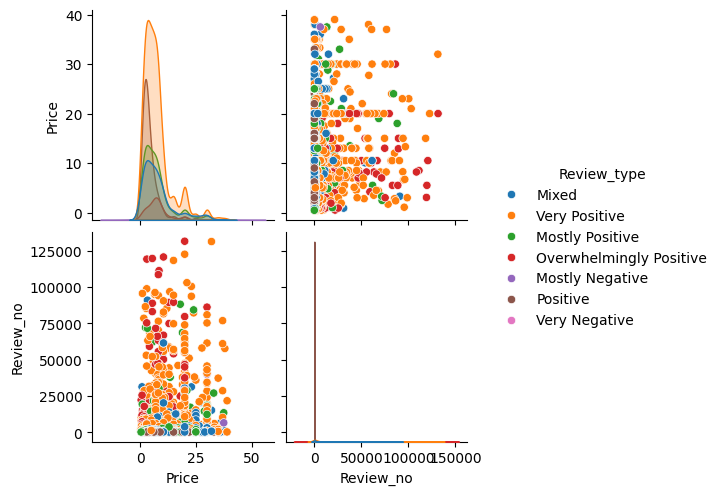

In [222]:
sns.pairplot(clean_data,hue="Review_type")

In [287]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
#lets split the input and output features
x_input=clean_data[["Price","Review_no"]]
y_input=clean_data["Review_type"]
x_scaler=StandardScaler()
x_scaled=x_scaler.fit_transform(x_input)
encoding=LabelEncoder()
y=encoding.fit_transform(y_input)
x_dataframe=pd.DataFrame(x_scaled,columns=["Price","Review_no"])

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_dataframe,y, test_size=0.3)

In [224]:
from keras._tf_keras.keras.models import Sequential
from keras._tf_keras.keras.layers import Dense
#let's design the ML model
model=Sequential()
model.add(Dense(4,input_shape=(2,),activation="relu"))
model.add(Dense(32,activation="relu"))
model.add(Dense(64,activation="sigmoid"))
model.add(Dense(128,activation="relu"))
model.add(Dense(7,activation="softmax"))
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam", metrics=["accuracy"])
model.fit(x_train,y_train,epochs=100)

Epoch 1/100


c:\Users\julth\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


147/147 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4316 - loss: 1.5010
Epoch 2/100
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4565 - loss: 1.3824
Epoch 3/100
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4482 - loss: 1.3583
Epoch 4/100
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4607 - loss: 1.3167
Epoch 5/100
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4626 - loss: 1.2970
Epoch 6/100
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4797 - loss: 1.2759
Epoch 7/100
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4810 - loss: 1.2531
Epoch 8/100
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5129 - loss: 1.2178
Epoch 9/100
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5169 - loss: 1.2026
Epoch 10/100
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5305 - loss: 1.1966
Epoch 11/100
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5361 - loss: 1.1806
Epoch 12/100
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

In [225]:
#let's make the calculate the value of each prediction
predict=model.predict(x_test)
y_predict=[]
for value in predict:
    y_predict.append(np.argmax(value))
y_true=[]
for value in y_test[0:10]:
    y_true.append(value)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


<h1>Comparing the Predicted Values and the True Values</h1>

In [226]:
print(y_predict[0:10])
y_true

[0, 6, 6, 4, 4, 4, 6, 6, 6, 4]


[0, 6, 6, 4, 4, 2, 2, 0, 6, 4]

In [265]:
print("Y Prediction:  ",encoding.inverse_transform(y_predict[0:10]))
print("Y Real:        ",encoding.inverse_transform(y_true[0:10]))

Y Prediction:   ['Mixed' 'Very Positive' 'Very Positive' 'Positive' 'Positive' 'Positive'
 'Very Positive' 'Very Positive' 'Very Positive' 'Positive']
Y Real:         ['Mixed' 'Very Positive' 'Very Positive' 'Positive' 'Positive'
 'Mostly Positive' 'Mostly Positive' 'Mixed' 'Very Positive' 'Positive']


In [268]:
from sklearn.metrics import confusion_matrix,classification_report
confusion=confusion_matrix(y_test,y_predict)
confusion

array([[ 18,   0,   0,   0,  87,   0, 231],
       [  0,   0,   0,   0,   0,   0,  10],
       [  6,   0,   0,   0,  73,   0, 278],
       [  0,   0,   0,   0,   0,   0,  92],
       [  3,   0,   0,   0, 308,   0,   1],
       [  0,   0,   0,   0,   0,   0,   3],
       [  6,   0,   0,   0,   5,   0, 895]], dtype=int64)

In [286]:
report=classification_report(y_test,y_predict)
print(report)


              precision    recall  f1-score   support

           0       0.55      0.05      0.10       336
           1       0.00      0.00      0.00        10
           2       0.00      0.00      0.00       357
           3       0.00      0.00      0.00        92
           4       0.65      0.99      0.78       312
           5       0.00      0.00      0.00         3
           6       0.59      0.99      0.74       906

    accuracy                           0.61      2016
   macro avg       0.26      0.29      0.23      2016
weighted avg       0.46      0.61      0.47      2016



c:\Users\julth\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\julth\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\julth\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

Text(0.5, 1.0, 'Heat Map')

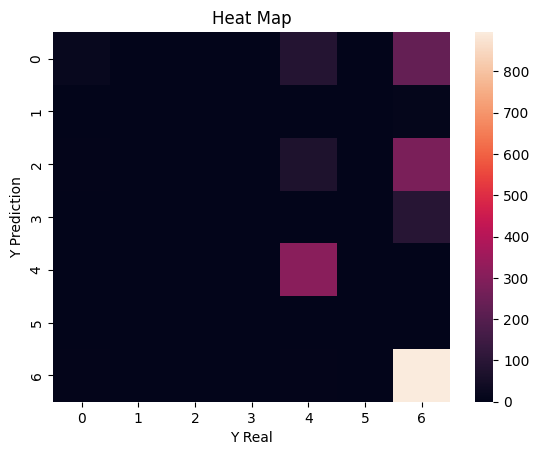

In [272]:
confusion_heatmap=sns.heatmap(confusion[0:10])
confusion_heatmap.set_xlabel("Y Real")
confusion_heatmap.set_ylabel("Y Prediction")
confusion_heatmap.set_title("Heat Map")

In [244]:
from keras._tf_keras.keras.saving import save_model
m_save=model.save(filepath="Action Game Classification ML\GameRatingPrediction.h5")


<>:2: SyntaxWarning: invalid escape sequence '\G'
<>:2: SyntaxWarning: invalid escape sequence '\G'
C:\Users\julth\AppData\Local\Temp\ipykernel_16196\1801119076.py:2: SyntaxWarning: invalid escape sequence '\G'
  m_save=model.save(filepath="Action Game Classification ML\GameRatingPrediction.h5")
